In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


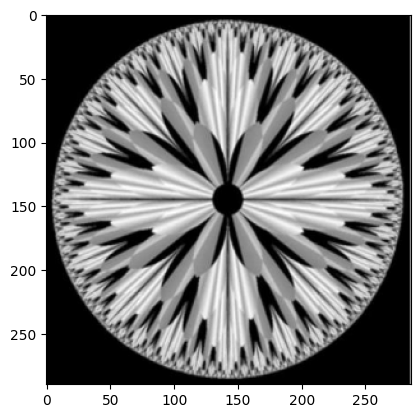

In [6]:
img = np.array(Image.open('./assets/bit-slicing.png').convert('L'))

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [12]:
def slicing(img, plane=1):
    # Perform a bitwise AND operation on the entire image at once
    bit_mask = 2 ** plane
    # checks each pixel value in img against the bit_mask
    # if non zero => 255 else 0
    new_bit_slicing = np.where(img & bit_mask, 255, 0)
    
    return new_bit_slicing

In [13]:
def plot_bit(img, x, y):
    fig, ax = plt.subplots(2, 4, figsize=(x, y))
    ax00 = ax[0][0]
    ax01 = ax[0][1]
    ax02 = ax[0][2]
    ax03 = ax[0][3]
    ax10 = ax[1][0]
    ax11 = ax[1][1]
    ax12 = ax[1][2]
    ax13 = ax[1][3]

    ax00.set_title('Bit Plane 7', fontsize=15)
    ax00.imshow(slicing(img, 7), cmap='gray', vmin=0, vmax=255)

    ax01.set_title('Bit Plane 6', fontsize=15)
    ax01.imshow(slicing(img, 6), cmap='gray', vmin=0, vmax=255)

    ax02.set_title('Bit Plane 5', fontsize=15)
    ax02.imshow(slicing(img, 5), cmap='gray', vmin=0, vmax=255)

    ax03.set_title('Bit Plane 4', fontsize=15)
    ax03.imshow(slicing(img, 4), cmap='gray', vmin=0, vmax=255)

    ax10.set_title('Bit Plane 3', fontsize=15)
    ax10.imshow(slicing(img, 3), cmap='gray', vmin=0, vmax=255)

    ax11.set_title('Bit Plane 2', fontsize=15)
    ax11.imshow(slicing(img, 2), cmap='gray', vmin=0, vmax=255)

    ax12.set_title('Bit Plane 1', fontsize=15)
    ax12.imshow(slicing(img, 1), cmap='gray', vmin=0, vmax=255)

    ax13.set_title('Bit Plane 0', fontsize=15)
    ax13.imshow(slicing(img, 0), cmap='gray', vmin=0, vmax=255)

    plt.show()

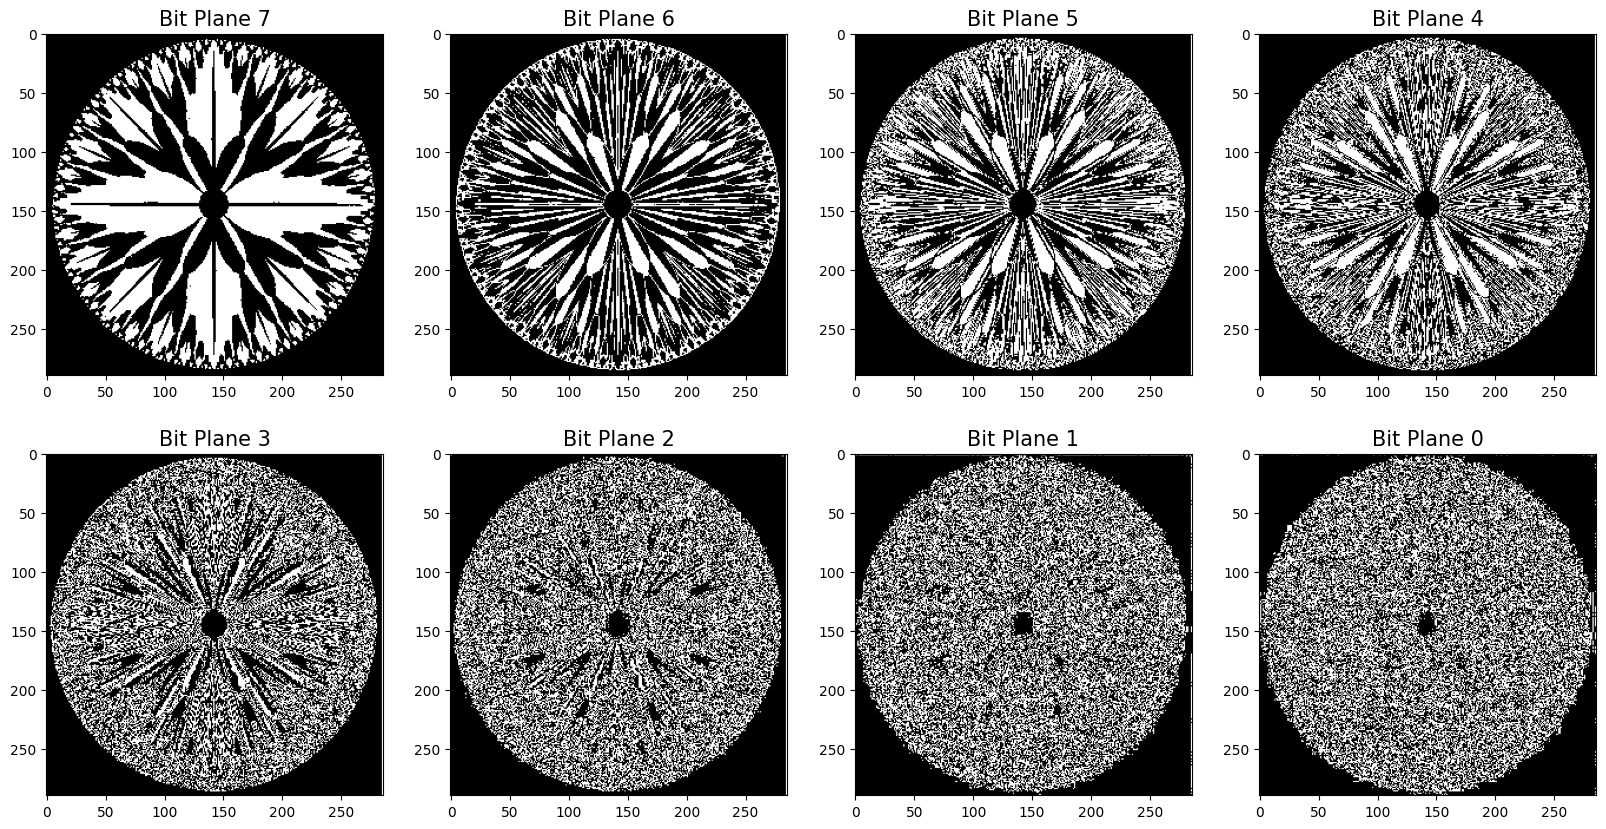

In [14]:
plot_bit(img, 20, 10)

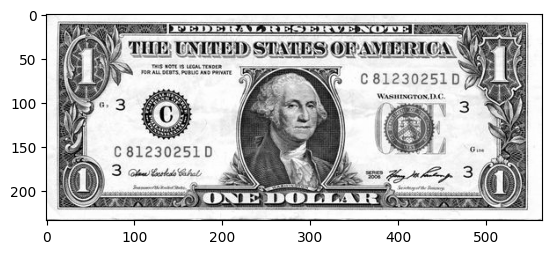

In [15]:
dollar_img = np.array(Image.open('./assets/onedollar.jpg').convert('L'))

# Plot the image
plt.imshow(dollar_img, cmap='gray')
plt.show()


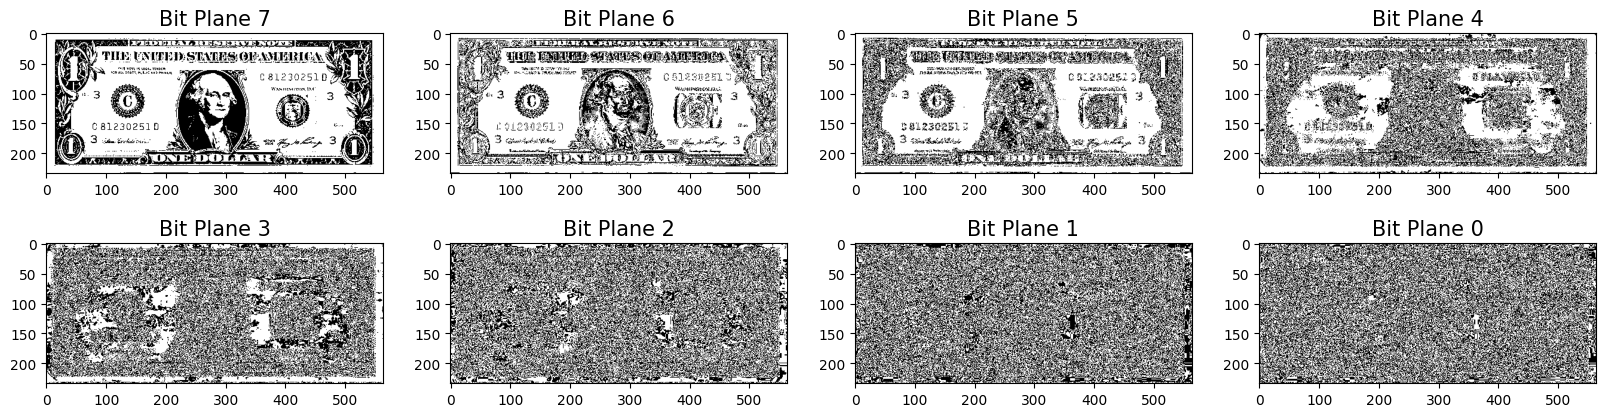

In [25]:
plot_bit(dollar_img, 20, 5)

In [45]:
def overlay_bitplanes(dollar_img, bit_planes, bitplanes_to_use):
    overlayed_image = np.zeros(dollar_img.shape, dtype=np.uint8)
    for i, bit_plane in enumerate(bit_planes):
        if i in bitplanes_to_use:
            overlayed_image += (bit_plane << i)
    return overlayed_image

In [46]:
# Define the number of bits and the bitplanes to use
num_bits = 8
bitplanes_to_use = [3, 4, 6, 7]
bitplanes_to_use_2 = [0, 1, 2, 5]

# Generate all bit planes
bit_planes = [(dollar_img >> i) & 1 for i in range(num_bits)]

# Convert the images to uint8 format
overlayed_image = np.uint8(overlay_bitplanes(dollar_img, bit_planes, bitplanes_to_use))
overlayed_image_2 = np.uint8(overlay_bitplanes(dollar_img, bit_planes, bitplanes_to_use_2))

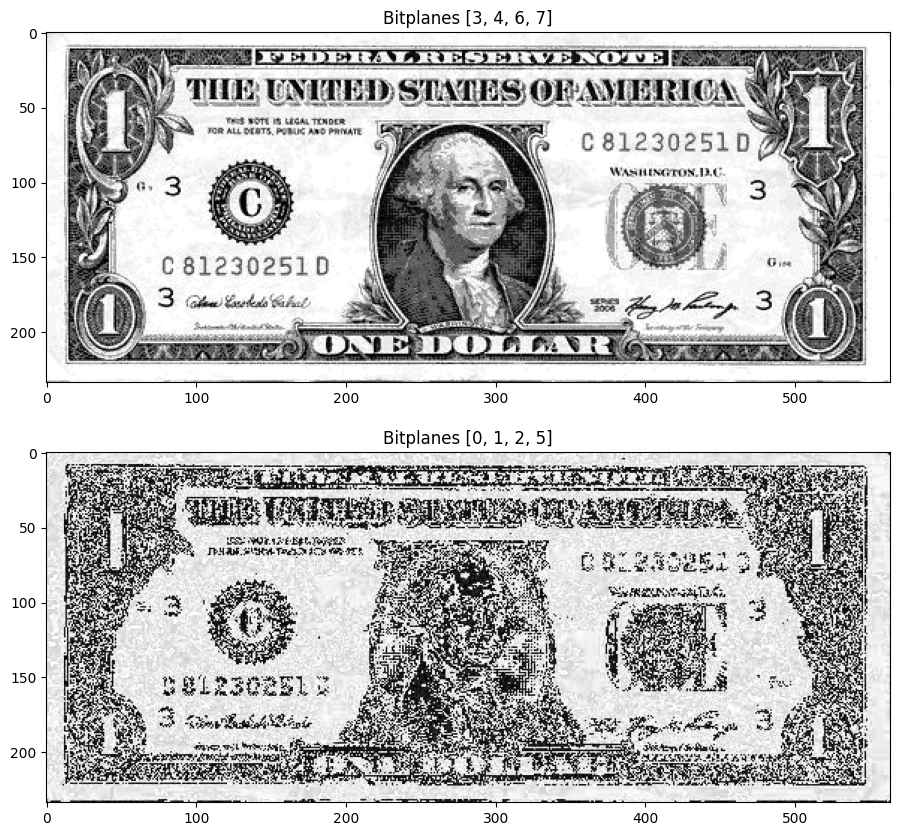

In [48]:
# Plot the images
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].imshow(overlayed_image, cmap='gray')
ax[0].set_title(f'Bitplanes {bitplanes_to_use}')
ax[1].imshow(overlayed_image_2, cmap='gray')
ax[1].set_title(f'Bitplanes {bitplanes_to_use_2}')

plt.show()